In [56]:
import pandas as pd

arr = []
# arr.append(pd.read_csv('../data files/results/CubeSort.csv'))
# arr.append(pd.read_csv('../data files/results/QuickSort.csv'))
# arr.append(pd.read_csv('../data files/results/MergeSort.csv'))
# arr.append(pd.read_csv('../data files/results/HeapSort.csv'))
arr.append(pd.read_csv("temp.csv"))
df = pd.concat(arr,ignore_index=True)

df.head()

,Algorithm,Runtime
0,CubeSort,21.450939
1,CubeSort,33.906315
2,CubeSort,33.300251
3,CubeSort,33.021030
4,CubeSort,31.959818


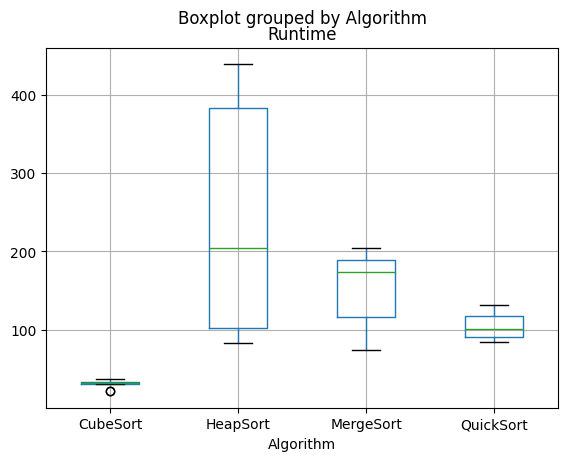

In [57]:
import matplotlib.pyplot as plt
df.boxplot(column="Runtime", by="Algorithm")
plt.show()

Hipótesis H_0: El promedio del tiempo de ejecución para los 4 algoritmos es el mismo

In [61]:
# Verificación de supuestos de distribución normal y homogeneidad de varianzas
import scipy.stats
SIGNIFICANCE = 0.05
normal_distributions = True
homogeneous_variances = True

ss = []
for algo in ["CubeSort","QuickSort","MergeSort","HeapSort"]:
  subset = df.loc[df['Algorithm'] == algo, 'Runtime']
  ss.append(subset)
  stat, p_value = scipy.stats.shapiro(subset)
  print(f"Shapiro-Wilk for {algo} group: stat={stat}, p-value={p_value}")
  if p_value < SIGNIFICANCE:
    normal_distributions == False

stat, p_value = scipy.stats.levene(ss[0],ss[1],ss[2],ss[3])
print(f"Levene test for all four groups: stat={stat}, p-value={p_value}")
if p_value < SIGNIFICANCE:
  homogeneous_variances = False

Shapiro-Wilk for CubeSort group: stat=0.7866390989760017, p-value=0.003427805506126604
Shapiro-Wilk for QuickSort group: stat=0.9283762546550055, p-value=0.28951326585706816
Shapiro-Wilk for MergeSort group: stat=0.8822723430326738, p-value=0.06261867960078317
Shapiro-Wilk for HeapSort group: stat=0.8363406116120272, p-value=0.01456664146048769
Levene test for all four groups: stat=28.60585892045861, p-value=4.5943581760277816e-11


In [ ]:
# Anova o alternativas
null_hypothesis = True
if normal_distributions and homogeneous_variances:
  f_stat, p_value = scipy.stats.f_oneway(ss[0],ss[1],ss[2],ss[3])
  print(f"ANOVA for algorithm runtimes: f-stat={f_stat}, p-value={p_value}")
else: # todo: Implement Welch's ANOVA
  h_stat, p_value = scipy.stats.kruskal(ss[0],ss[1],ss[2],ss[3])
  print(f"Kruskal-Wallis test for algorithm runtimes: H-stat={h_stat}, p-value={p_value}")

  
if p_value < SIGNIFICANCE:
  null_hypothesis = False

Kruskal-Wallis test for algorithm runtimes: H-stat=35.518796992481185, p-value=9.464738771695563e-08


In [ ]:
# Post hoc tests
if not null_hypothesis:
  if normal_distributions:
    scipy.stats.tukey_hsd(ss[0],ss[1],ss[2],ss[3])
  else:
    # todo: Implement Bonferroni correction
    pass

In [34]:
df.to_csv("dump.csv",index=False)